## Analysis

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [182]:
df = pd.read_csv('.\\train.csv')
df_test = pd.read_csv('.\\test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [184]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [186]:
for col in df:
  unq_vals = df[col].unique()
  num_unq_vals = len(unq_vals)
  
  if num_unq_vals < 12:
    print(f'{col:17} | {df[col].dtype} | {num_unq_vals:5} | {unq_vals}')
  else:
    print(f'{col:17} | {df[col].dtype} | {num_unq_vals:5} |')

PassengerId       | int64 |   891 |
Survived          | int64 |     2 | [0 1]
Pclass            | int64 |     3 | [3 1 2]
Name              | object |   891 |
Sex               | object |     2 | ['male' 'female']
Age               | float64 |    89 |
SibSp             | int64 |     7 | [1 0 3 4 2 5 8]
Parch             | int64 |     7 | [0 1 2 5 3 4 6]
Ticket            | object |   681 |
Fare              | float64 |   248 |
Cabin             | object |   148 |
Embarked          | object |     4 | ['S' 'C' 'Q' nan]


In [187]:
missing_value_cols = [col for col in df if df[col].isna().sum() > (0.2 * df.shape[0])]
missing_value_cols

['Cabin']

*Notes:*
- **PassengerId** and **Name** are unique for all passengers - must be removed.
- **Age** and **Embarked** have null values for some passengers.
- **Embarked**, **Ticket** and **Sex** are objects.
- **Cabin** has non-NaN values for < 20%. 

In [188]:
df.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [189]:
df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [190]:
df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [191]:
df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [192]:
df['Ticket'].value_counts().value_counts()

1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: Ticket, dtype: int64

Most **Ticket** values are unique.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

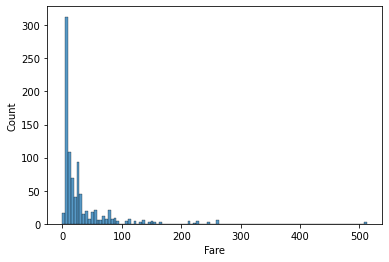

In [193]:
sns.histplot(df['Fare'])

**Fare** is skewed to the left.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

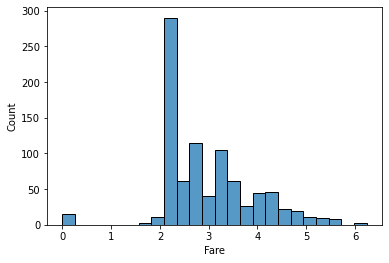

In [194]:
sns.histplot(np.log1p(df['Fare']))

## Preprocessing

In [195]:
def get_X_y(df):
  df = df.copy()

  df = df.drop(['Name', 'PassengerId','Cabin', 'Ticket'], axis=1)

  df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
  df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

  df['Fare'] = np.log1p(df['Fare'])
  df['Age'] = np.log1p(df['Age'])

  dummies = pd.get_dummies(df.select_dtypes('object'))

  df = df.drop(df.select_dtypes('object').columns, axis=1)

  result = pd.concat([df, dummies], axis=1)

  if 'Survived' in df.columns:
    X = result.drop(['Survived'], axis=1)
    y = result['Survived']  
    return X, y

  else:
    return result, None

In [196]:
def preprocess_inputs(df):
  X, y = get_X_y(df)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
  
  return X_train, X_test, y_train, y_test

In [197]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [198]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
638,0.782409,0.799915,-0.482034,5.662946,0.790701,1.329225,-1.329225,-0.462208,-0.310659,0.598981
598,0.782409,0.000903,-0.482034,-0.473444,-0.868586,-0.752318,0.752318,2.163527,-0.310659,-1.669501
158,0.782409,0.000903,-0.482034,-0.473444,-0.701412,-0.752318,0.752318,-0.462208,-0.310659,0.598981
577,-1.639658,0.724772,0.359162,-0.473444,1.138776,1.329225,-1.329225,-0.462208,-0.310659,0.598981
729,0.782409,0.061308,0.359162,-0.473444,-0.783815,1.329225,-1.329225,-0.462208,-0.310659,0.598981
...,...,...,...,...,...,...,...,...,...,...
396,0.782409,0.381101,-0.482034,-0.473444,-0.792081,1.329225,-1.329225,-0.462208,-0.310659,0.598981
345,-0.428624,0.000903,-0.482034,-0.473444,-0.316565,1.329225,-1.329225,-0.462208,-0.310659,0.598981
708,-1.639658,-0.127516,-0.482034,-0.473444,2.162320,1.329225,-1.329225,-0.462208,-0.310659,0.598981
627,-1.639658,-0.195978,-0.482034,-0.473444,1.478807,1.329225,-1.329225,-0.462208,-0.310659,0.598981


## Classification

### KNN

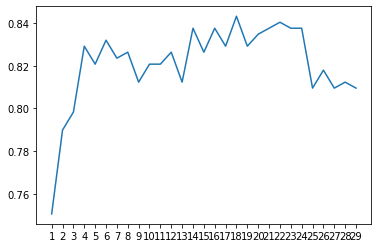

In [199]:
best_KNN_model = None
best_score = -1
scores = {}

for neighs in range(1, 30):
  model = KNeighborsClassifier(neighs)
  model.fit(X_train, y_train)

  score = model.score(X_test, y_test)

  if score > best_score:
    best_score = score
    best_KNN_model = model
  
  scores[str(neighs)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

In [200]:
y_pred = best_KNN_model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Best score: {best_score}')

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       221
           1       0.87      0.69      0.77       136

    accuracy                           0.84       357
   macro avg       0.85      0.81      0.83       357
weighted avg       0.85      0.84      0.84       357

Best score: 0.8431372549019608


In [201]:
print(confusion_matrix(y_test, y_pred))

[[207  14]
 [ 42  94]]


### Logistic Regression

In [202]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(f'Score: {model.score(X_test, y_test)}')

Score: 0.7983193277310925


In [203]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       221
           1       0.76      0.69      0.72       136

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.80      0.80      0.80       357



In [204]:
print(confusion_matrix(y_test, y_pred))

[[191  30]
 [ 42  94]]


In [205]:
log_loss(y_test, model.predict_proba(X_test))

0.43453781984348494

In [206]:
log_loss(y_train, model.predict_proba(X_train))

0.4309128338636857

### Export

In [207]:
X_test, _ = get_X_y(df_test)
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

model = best_KNN_model
model.fit(X_train, y_train)
prediction = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': prediction})
output.to_csv('submission_knn.csv', index=False)
# Score: 0.76794

In [208]:
X_test, _ = get_X_y(df_test)
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': prediction})
output.to_csv('submission_logreg.csv', index=False)
# Score: 0.75598